In [1]:
import numpy as np
import sparse

import matplotlib.pyplot as plt

In [2]:
key = "../data/24hpf/ProSPr24.npz"
sdata = sparse.load_npz(key)
# dense = np.array(sdata.todense(), dtype=np.uint16) * 2
dense = sdata.todense()

In [3]:
from pyevtk.hl import gridToVTK

In [4]:
dense.shape

(339, 325, 325)

In [5]:
x = np.arange(dense.shape[1])
y = np.arange(dense.shape[1])
z = np.arange(dense.shape[0])

In [6]:
gridToVTK("/Users/nikol/Dropbox/test", x, y, z, cellData={'dense': dense}, )

'C:\\Users\\nikol\\Dropbox\\test.vtr'

In [ ]:
from vtk import 

In [7]:
import vtk
r = vtkDataSetReader()
r.SetFileName("/Users/nikol/Dropbox/test.vtr")

w = vtkDataSetWriter()
w.SetInput( r.GetOutput() )
w.SetFileName("/Users/nikol/Dropbox/test.vtk")
w.Write()

NameError: name 'vtkDataSetReader' is not defined

In [7]:
from vtk.util import numpy_support

import vtk

shape = dense.shape
VTK_data = numpy_support.numpy_to_vtk(num_array=dense.ravel(), deep=True, array_type=vtk.VTK_INT)

def numpyToVTK(data):
    data_type = vtk.VTK_INT
    shape = data.shape

    flat_data_array = data.ravel()
    vtk_data = numpy_support.numpy_to_vtk(num_array=flat_data_array, deep=True, array_type=data_type)
    
    img = vtk.vtkImageData()
    img.GetPointData().SetScalars(vtk_data)
    img.SetDimensions(shape[0], shape[1], shape[2])
    return img

In [3]:
from stl import mesh

In [4]:
test = mesh.Mesh(dense, remove_empty_areas=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [3]:
import nrrd

In [10]:
nrrd.write("/Users/nikol/Dropbox/test.nrrd", dense, header={"encoding": "raw"})

In [8]:
readdata, header = nrrd.read("/Users/nikol/Dropbox/test.nrrd")
print(readdata.shape)
print(header)

(3, 10, 2)
OrderedDict([('type', 'double'), ('dimension', 3), ('sizes', array([ 3, 10,  2])), ('endian', 'little'), ('encoding', 'raw')])


In [7]:
data = np.linspace(1, 60, 60).reshape((3, 10, 2))
nrrd.write("/Users/nikol/Dropbox/test.nrrd", data, header={"encoding": "raw"})

In [ ]:
def write_dicom(pixel_array, filename_endian):
    #pixel_array: 2D numpy ndarray.
    #filename: string name for the output file.

    file_meta= Dataset()
    file_meta.TransferSyntaxUID= ImplicitVRLittleEndian
    file_meta.MediaStorageSOPClassUID = pydicom.uid.generate_uid() 
    file_meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
    file_meta.ImplementationClassUID = pydicom.uid.generate_uid()

    ds = FileDataset(filename_endian, {}, file_meta= file_meta, preamble= b"\0"*128)
    ds.Modality = 'OT'

    ds.ContentDate = str(datetime.date.today()).replace('-','')
    ds.ContentTime = '010101.000000'
    ds.StudyInstanceUID =  pydicom.uid.generate_uid() 
    ds.SeriesInstanceUID = pydicom.uid.generate_uid() 
    ds.SOPInstanceUID =    pydicom.uid.generate_uid() 
    ds.SOPClassUID = pydicom.uid.generate_uid()
    ds.is_little_endian = True
    ds.is_implicit_VR = True

    ## These are the necessary imaging components of the FileDataset object.
    ds.SamplesPerPixel = 1
    ds.PhotometricInterpretation = "MONOCHROME1"
    ds.PixelRepresentation = 0
    ds.PlanarConfiguration = 0
    ds.HighBit = 7
    ds.BitsStored = 8
    ds.BitsAllocated = 8
    ds.SmallestImagePixelValue = dense.min()
    ds[0x00280106].VR = 'US'
    ds.LargestImagePixelValue = dense.max()
    ds[0x00280107].VR = 'US'
    ds.NumberOfFrames = dense.shape[0]
    ds[0x00280107].VR = 'US'
    ds.Columns = pixel_array.shape[1]
    ds.Rows = pixel_array.shape[2]
    
    packed = dense.tobytes()
    ds.PixelData = packed + b'\x00' if len(packed) % 2 else packed
    # packed = pydicom.pixel_data_handlers.numpy_handler.pack_bits((dense > 0).ravel())
    # ds.PixelData = packed + b'\x00' if len(packed) % 2 else packed
    ds.LossyImageCompression = '00'

    ds['PixelData'].is_undefined_length = True
    ds.save_as(filename_endian, write_like_original=True)

In [ ]:
write_dicom(dense, "/Users/nikol/Dropbox/test.dcm")

In [ ]:
339 * 325 * 325

35806875

In [ ]:
from pydicom import dcmread
import matplotlib.pyplot as plt

In [ ]:
test = dcmread('/Users/nikol/Dropbox/test.dcm')

In [ ]:
test

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: 1.2.826.0.1.3680043.8.498.62534059739171097599043582109865155936
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.73122443548155526812004205440407518455
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.50748058017270483700161619010636540155
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: 1.2.826.0.1.3680043.8.498.11816494367908880684818144874598263476
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.52171078123984213961633345569944019475
(0008, 0023) Content Date                        DA: '20221211'
(0008, 0033) Content Time                        TM: '010101.000000'
(0008, 0060) Modality                            CS: 'OT'
(0020, 000d) Study Instance UID         

In [ ]:
test.pixel_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

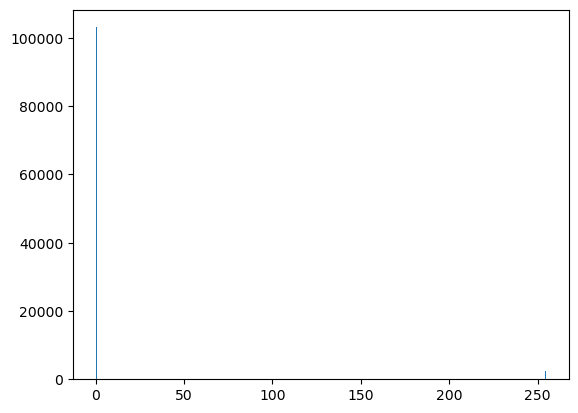

In [10]:
fig, ax = plt.subplots()
ax.hist(test.pixel_array[150].ravel(), bins=256);

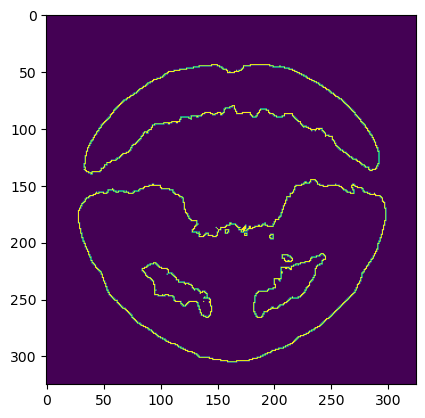

In [11]:
fig, ax = plt.subplots()
ax.imshow(test.pixel_array[150]);